# Home-Credit  Default Risk の概要
クレジットの借り入れ履歴がないために、たくさんの人々が融資を受けるのに苦労している。
これらの人は、信用できない悪質な貸し手に利用されてしまう。
そこでHome-Credit社は肯定的な借り入れシステムを導入することで、非銀行人口の財政的包摂の拡大に努めることをミッションとしている。
Home-Credit社は顧客の返済能力を予測するために、電話や取引情報を含む様々な代替データを利用している。
これらを機械学習や統計的な手法を用い、返済可能な顧客が拒絶されないようにする。

# データセットの説明

# bureau.csv

クレジットビューローに報告された他の金融機関から提供されたすべてのクライアントの以前のクレジット（サンプルにローンを持っているクライアントの場合）。
私たちのサンプルのすべてのローンには、申請日前に顧客がクレジットビューローに持っていたクレジット数と同数の行があります。
# bureau_balance.csv

クレジットビューローの前回のクレジットの月間残高。
このテーブルには、前回のクレジットについて過去に記録された各クレジットの履歴が1行ずつ表示されます（サンプルには#loansが含まれています*相対クレジット数*前回のクレジットで観測可能な履歴数） 。
# POS_CASH_balance.csv

申請者がホームクレジットを持っていた以前のPOS（ポイントオブセールス）および現金融資の月間残高スナップショット。
この表には、私たちのサンプルのローンに関連したホームクレジット（消費者金融および現金融資）の前回のクレジットの履歴の各月の行が1つあります（つまり、表は＃サンプルあり*相対相対クレジット数*以前のクレジットで観測可能な履歴がある行）があります。
# credit_card_balance.csv

申請者がホームクレジットを持っている以前のクレジットカードの月間残高スナップショット。
この表は、私たちのサンプルのローンに関連したホームクレジット（消費者金融および現金融資）の過去のクレジットの各月の履歴を1行にまとめたものです。以前のクレジットカードで観測可能な履歴がある月）の行。
# previous_application.csv

私たちのサンプルで融資を受けているお客様のホームクレジットローンのすべての以前のアプリケーション。
私たちのデータサンプルのローンに関連する以前のアプリケーションごとに1つの行があります。
# installments_payments.csv

私たちのサンプルのローンに関連して、ホームクレジットの以前に支払われたクレジットの返済履歴。
a）行なわれた支払いごとに1行プラスb）不在支払いのために1行があります。
1行は、1回の分割払いまたは1回の分割払いに相当し、前回のホームクレジットクレジットの1回の支払いに相当します。
# HomeCredit_columns_description.csv

このファイルには、さまざまなデータファイルの列の説明が含まれています。


# 必要なライブラリのインポート

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import lightgbm as lgb
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_palette("husl")
color = sns.set_palette("husl")


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# データセットの読み込み

In [4]:
application_train = pd.read_csv("input/application_train.csv")
application_test = pd.read_csv("input/application_test.csv")
bureau = pd.read_csv("input/bureau.csv")
bureau_balance = pd.read_csv("input/bureau_balance.csv")
credit_card_balance = pd.read_csv("input/credit_card_balance.csv")
installments_payments = pd.read_csv("input/installments_payments.csv")
previous_application = pd.read_csv("input/previous_application.csv")
POS_CASH_balance = pd.read_csv("input/POS_CASH_balance.csv")

# データの概要

In [5]:
application_train['SK_ID_CURR']

0         100002
1         100003
2         100004
3         100006
4         100007
5         100008
6         100009
7         100010
8         100011
9         100012
10        100014
11        100015
12        100016
13        100017
14        100018
15        100019
16        100020
17        100021
18        100022
19        100023
20        100024
21        100025
22        100026
23        100027
24        100029
25        100030
26        100031
27        100032
28        100033
29        100034
           ...  
307481    456225
307482    456226
307483    456227
307484    456228
307485    456229
307486    456230
307487    456231
307488    456232
307489    456233
307490    456234
307491    456235
307492    456236
307493    456237
307494    456238
307495    456239
307496    456240
307497    456241
307498    456242
307499    456243
307500    456244
307501    456245
307502    456246
307503    456247
307504    456248
307505    456249
307506    456251
307507    456252
307508    4562

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# 各特徴量のデータ型を確認

([<matplotlib.patches.Wedge at 0x1321a4908>,
 [Text(-0.113103,1.09417,'float64'),
  Text(-0.334526,-1.0479,'int64'),
  Text(1.00795,-0.440499,'object')],
 [Text(-0.0616926,0.59682,'53.3%'),
  Text(-0.182469,-0.571581,'33.6%'),
  Text(0.54979,-0.240272,'13.1%')])

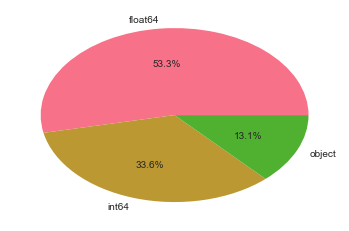

In [283]:
ratio_dtypes = application_train.dtypes.value_counts()
dtypes_index = application_train.dtypes.value_counts().index
plt.pie(ratio_dtypes, labels=dtypes_index,autopct="%1.1f%%")

object型が多いので、このままでは学習させることができない。
あとで、object型の特徴量を抽出して,factlizeやone-hotエンコーディングを必要に応じて施す必要がある

# 主要統計量からデータを俯瞰する

In [346]:
pd.set_option("display.max_columns", 101)
train_desc = application_train.describe()
train_desc

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

DAYS_EMPLOYEDのmaxの値を入力すると1000年となる。
この値は以上と思われるので、この特徴の外れ値の処理を行う必要がある。

In [4]:
application_train.AMT_INCOME_TOTAL.head()

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [5]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [8]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
previous_application.loc[:,['SK_ID_CURR','SK_ID_PREV','NAME_CASH_LOAN_PURPOSE','CHANNEL_TYPE','CODE_REJECT_REASON']]

,SK_ID_CURR,SK_ID_PREV,NAME_CASH_LOAN_PURPOSE,CHANNEL_TYPE,CODE_REJECT_REASON
0,271877,2030495,XAP,Country-wide,XAP
1,108129,2802425,XNA,Contact center,XAP
2,122040,2523466,XNA,Credit and cash offices,XAP
3,176158,2819243,XNA,Credit and cash offices,XAP
4,202054,1784265,Repairs,Credit and cash offices,HC
5,199383,1383531,Everyday expenses,Credit and cash offices,XAP
6,175704,2315218,XNA,Credit and cash offices,XAP
7,296299,1656711,XNA,Credit and cash offices,XAP
8,342292,2367563,XNA,Credit and cash offices,XAP
9,334349,2579447,XNA,Credit and cash offices,XAP


# 単変量解析

# 与信額の分布

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution AMT_CREDIT')

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


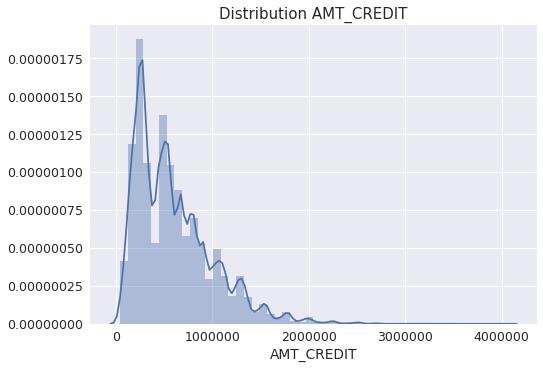

In [195]:
sns.set
sns.distplot(application_train["AMT_CREDIT"])
plt.title('Distribution AMT_CREDIT')

# 申し込み時の同伴者の分布

Text(0.5,1,'Who accompanied client when applying for the  application in %')

<Figure size 1440x10800 with 0 Axes>

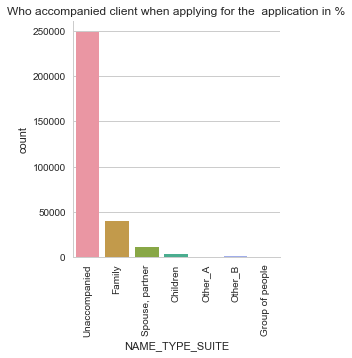

In [259]:
#application_train["NAME_TYPE_SUITE"].value_counts()
plt.figure(figsize=(12,12 )) 
sns.factorplot(x= "NAME_TYPE_SUITE",data=application_train, kind='count')
plt.xticks(rotation='vertical')
plt.title('Who accompanied client when applying for the  application in %')

# ローンの種類の割合

In [217]:
 application_train["NAME_CONTRACT_TYPE"].value_counts().index

Index(['Cash loans', 'Revolving loans'], dtype='object')

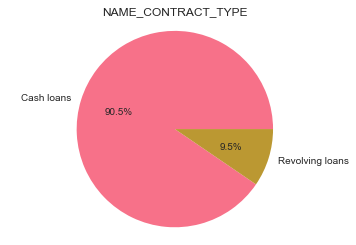

In [260]:
x =  application_train["NAME_CONTRACT_TYPE"].value_counts().index
y = application_train["NAME_CONTRACT_TYPE"].value_counts()/application_train["NAME_CONTRACT_TYPE"].value_counts().sum()
plt.pie(y, labels=x, autopct="%1.1f%%")
plt.axis('equal')
plt.title('NAME_CONTRACT_TYPE')
plt.show()


契約の種類に偏りが見られる

# 収入の種類

In [261]:
y = application_train["NAME_INCOME_TYPE"].value_counts()
x = application_train["NAME_INCOME_TYPE"].value_counts().index

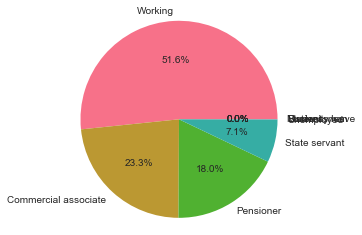

In [262]:
plt.pie(y, labels=x, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

年金受給者の割合が多い
年金受給額は一般的に低いことと、健康リスクの観点から与信審査は通りにくそう。

# 家族形態の割合


In [242]:
y = application_train["NAME_FAMILY_STATUS"].value_counts()
x = application_train["NAME_FAMILY_STATUS"].value_counts().index

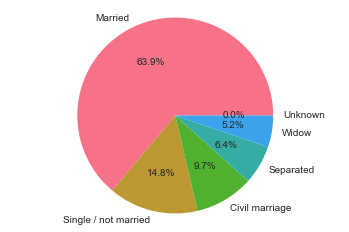

In [243]:
plt.pie(y, labels=x, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

結婚している人が大半。結婚すると家の購入や、子供のお金など出費が多そう。
結婚しているか、子供がいるかもしくはその人数に対する年収の比率で新しい特徴を定義できそう。

# 職業の割合

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

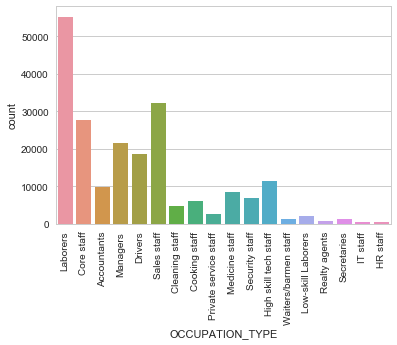

In [252]:
y = application_train["OCCUPATION_TYPE"].value_counts()

sns.countplot(x ="OCCUPATION_TYPE" ,data = application_train)
plt.xticks(rotation = 'vertical')

不安定な収入の波がありそうな職業は、意図せず返済が遅れてしまったりする確率が高い
また、定性的に返済にかかる問題がありそうな職種にも留意したい。

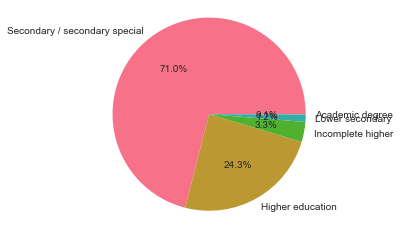

In [253]:
y = application_train["NAME_EDUCATION_TYPE"].value_counts()
x = application_train["NAME_EDUCATION_TYPE"].value_counts().index
plt.pie(y, labels=x, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

# 目的変数の値別に変数に格納

In [12]:
grouped_0 = application_train.groupby('TARGET').get_group(0)


In [13]:
grouped_1 = application_train.groupby('TARGET').get_group(1)

# 特徴量の中から、任意に目的変数と相関のありそうなものを目的変数と比較

CODE_GENDER:性別　　
FLAG_OWN_CAR:車を持っているか　　
FLAG_OWN_REALTY:持ち家か　　
CNT_CHILDREN:子供の数　　
# カテゴリ変数と目的変数


# 男女と目的変数

In [153]:
# grouped_0.CODE_GENDER.value_counts()


In [15]:
gen_cnt_0 = grouped_0.CODE_GENDER.value_counts()

## TERGET = 0 の男女比

In [154]:
#割合
gen_cnt_0/gen_cnt_0.sum()

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

In [155]:
ratio_gen_0= gen_cnt_0/gen_cnt_0.sum()

In [156]:
ratio_gen_0 = pd.DataFrame(ratio_gen_0)

In [159]:
ratio_gen_0 = ratio_gen_0.rename(columns={'CODE_GENDER': 'CODE_GENDER_0'})

In [160]:
ratio_gen_0

,CODE_GENDER_0
F,0.666032
M,0.333954
XNA,0.000014


In [120]:
# sns.barplot(gen_cnt_0 .index,gen_cnt_0.values)
# plt.title("GEMDER_0", fontsize=15)

In [121]:
# plt.figure(figsize=(10,10))
# sizes = np.array(gen_cnt_0/gen_cnt_0.sum())
# label =  np.array(gen_cnt_0.index)
# plt.pie(sizes, labels=label, 
#         autopct='%1.1f%%', startangle=200)
# plt.title("GEMDER_0", fontsize=15)

In [124]:
# grouped_1.CODE_GENDER.value_counts()

In [20]:
# gen_cnt_1 = grouped_1.CODE_GENDER.value_counts()

In [21]:
#割合
gen_cnt_1/gen_cnt_1.sum()

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

In [161]:
ratio_gen_1= gen_cnt_1/gen_cnt_1.sum()

In [162]:
ratio_gen_1= pd.DataFrame(ratio_gen_1)

In [163]:
ratio_gen_1= ratio_gen_1.rename(columns={'CODE_GENDER': 'CODE_GENDER_1'})

In [164]:
ratio_gen_1

,CODE_GENDER_1
F,0.570796
M,0.429204


## 目的変数別の男女比率

In [165]:
#先ほどのデータを連結
pd.concat([ratio_gen_0, ratio_gen_1],axis=1)


,CODE_GENDER_0,CODE_GENDER_1
F,0.666032,0.570796
M,0.333954,0.429204
XNA,0.000014,NaN


In [122]:
# sns.barplot(gen_cnt_1 .index,gen_cnt_1.values)
# plt.title("GEMDER_1", fontsize=15)

In [123]:
# plt.figure(figsize=(10,10))
# sizes = np.array(gen_cnt_1/gen_cnt_1.sum())
# label =  np.array(gen_cnt_1.index)
# plt.pie(sizes, labels=label, 
#         autopct='%1.1f%%', startangle=200)
# plt.title("GENDER_1", fontsize=15)

## 円グラフで可視化

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


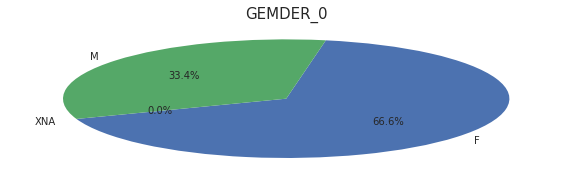

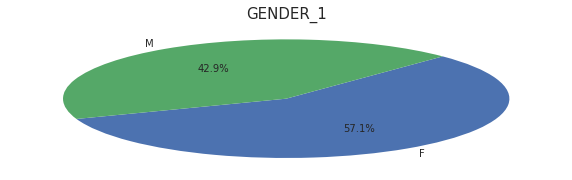

In [24]:
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
sizes = np.array(gen_cnt_0/gen_cnt_0.sum())
label =  np.array(gen_cnt_0.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("GEMDER_0", fontsize=15)

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 2)
sizes = np.array(gen_cnt_1/gen_cnt_1.sum())
label =  np.array(gen_cnt_1.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("GENDER_1", fontsize=15)
plt.show()

## 目的変数の値によって男女比率に乖離がある
## 定性的に男の方が債務不履行に陥る傾向がある

# 車

In [25]:
car_cnt_0 = grouped_0.FLAG_OWN_CAR.value_counts()

In [26]:
car_cnt_0

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64

In [27]:
#割合
car_cnt_0/car_cnt_0.sum()

N    0.656824
Y    0.343176
Name: FLAG_OWN_CAR, dtype: float64

In [146]:
# sns.barplot(car_cnt_0 .index,car_cnt_0.values)
# plt.title("CAR", fontsize=15)

In [147]:
# plt.figure(figsize=(10,10))
# sizes = np.array(car_cnt_0/car_cnt_0.sum())
# label =  np.array(car_cnt_0.index)
# plt.pie(sizes, labels=label, 
#         autopct='%1.1f%%', startangle=200)
# plt.title("CAT_0", fontsize=15)

In [30]:
car_cnt_1=grouped_1.FLAG_OWN_CAR.value_counts()

In [148]:
# car_cnt_1

In [32]:
#割合
car_cnt_1/car_cnt_1.sum()

N    0.694824
Y    0.305176
Name: FLAG_OWN_CAR, dtype: float64

In [149]:
# sns.barplot(car_cnt_1 .index,car_cnt_1.values)
# plt.title("CAR", fontsize=15)

In [150]:
# car_cnt_1.index

In [151]:
# plt.figure(figsize=(10,10))
# sizes = np.array(car_cnt_1/car_cnt_1.sum())
# label =  np.array(car_cnt_1.index)
# plt.pie(sizes, labels=label, 
#         autopct='%1.1f%%', startangle=200)
# plt.title("CAT_1", fontsize=15)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


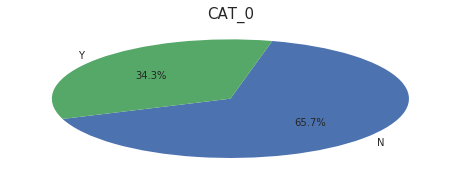

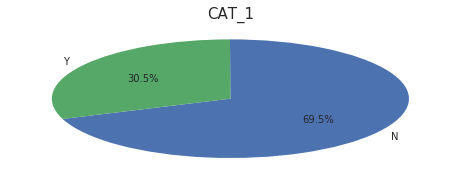

In [36]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
sizes = np.array(car_cnt_0/car_cnt_0.sum())
label =  np.array(car_cnt_0.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("CAT_0", fontsize=15)

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 2)
sizes = np.array(car_cnt_1/car_cnt_1.sum())
label =  np.array(car_cnt_1.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("CAT_1", fontsize=15)
plt.show()

# 著しい乖離はない

# 持ち家

In [37]:
house_cnt_0 = grouped_0.FLAG_OWN_REALTY.value_counts()

In [38]:
house_cnt_0/house_cnt_0.sum()

Y    0.694513
N    0.305487
Name: FLAG_OWN_REALTY, dtype: float64

Text(0.5,1,'Own House')

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


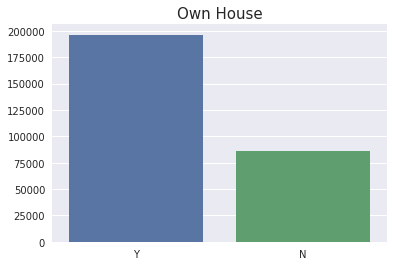

In [39]:
# sns.barplot(house_cnt_0 .index,house_cnt_0.values)
# plt.title("Own House", fontsize=15)

Text(0.5,1,'Own House_0')

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


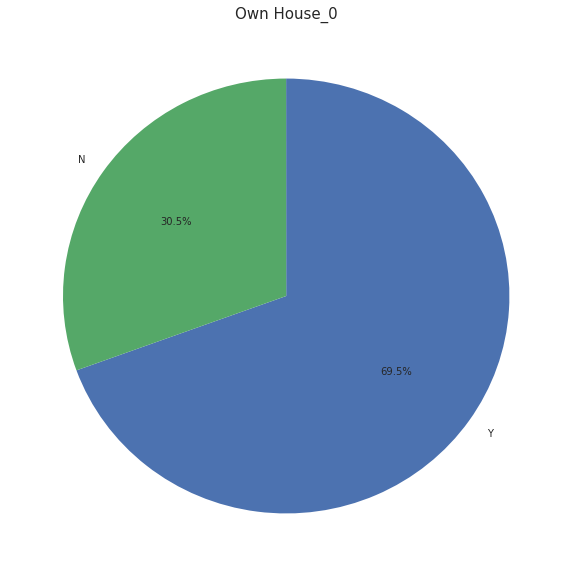

In [40]:
# plt.figure(figsize=(10,10))
# sizes = np.array(house_cnt_0/house_cnt_0.sum())
# label =  np.array(house_cnt_0.index)
# plt.pie(sizes, labels=label, 
#         autopct='%1.1f%%', startangle=200)
# plt.title("Own House_0", fontsize=15)

In [41]:
house_cnt_1 = grouped_1.FLAG_OWN_REALTY.value_counts()

In [42]:
house_cnt_1/house_cnt_1.sum()

Y    0.684109
N    0.315891
Name: FLAG_OWN_REALTY, dtype: float64

In [263]:
# sns.barplot(house_cnt_1 .index,house_cnt_0.values)
# plt.title("Own House", fontsize=15)

Text(0.5,1,'Own House_1')

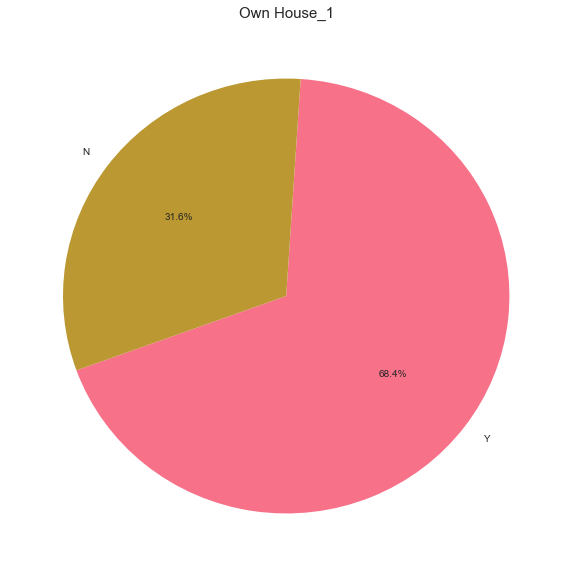

In [264]:
plt.figure(figsize=(10,10))
sizes = np.array(house_cnt_1/house_cnt_1.sum())
label =  np.array(house_cnt_1.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("Own House_1", fontsize=15)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


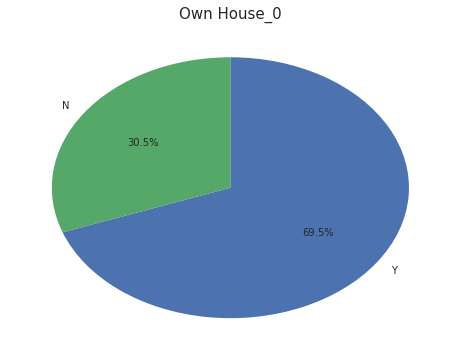

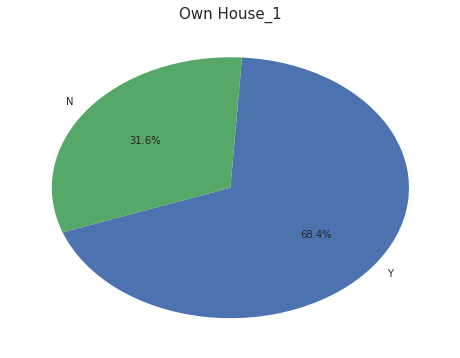

In [45]:
plt.figure(figsize=(8,6))
sizes = np.array(house_cnt_0/house_cnt_0.sum())
label =  np.array(house_cnt_0.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("Own House_0", fontsize=15)

plt.figure(figsize=(8,6))
sizes = np.array(house_cnt_1/house_cnt_1.sum())
label =  np.array(house_cnt_1.index)
plt.pie(sizes, labels=label, 
        autopct='%1.1f%%', startangle=200)
plt.title("Own House_1", fontsize=15)
plt.show()

# 著しい乖離はない

# 子供の数

In [46]:
child_cnt_0 =grouped_0.CNT_CHILDREN.value_counts()

In [47]:
child_cnt_0/child_cnt_0.sum()

0     0.703119
1     0.196915
2     0.086371
3     0.011882
4     0.001323
5     0.000272
6     0.000053
7     0.000025
14    0.000011
19    0.000007
12    0.000007
10    0.000007
8     0.000007
Name: CNT_CHILDREN, dtype: float64

In [265]:
# sns.barplot(child_cnt_0 .index,child_cnt_0.values)
# plt.title("Number of children_0", fontsize=15)

In [49]:
child_cnt_1 = grouped_1.CNT_CHILDREN.value_counts()

In [50]:
child_cnt_1/child_cnt_1.sum()

0     0.669043
1     0.219698
2     0.093978
3     0.014421
4     0.002216
5     0.000282
6     0.000242
9     0.000081
11    0.000040
Name: CNT_CHILDREN, dtype: float64

In [266]:
# sns.barplot(child_cnt_1 .index,child_cnt_1.values)
# plt.title("Number of children_1", fontsize=15)

In [52]:
child_cnt_0.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 14, 19, 12, 10, 8], dtype='int64')

In [53]:
child_cnt_0/child_cnt_0.sum()

0     0.703119
1     0.196915
2     0.086371
3     0.011882
4     0.001323
5     0.000272
6     0.000053
7     0.000025
14    0.000011
19    0.000007
12    0.000007
10    0.000007
8     0.000007
Name: CNT_CHILDREN, dtype: float64

In [54]:
child_cnt_1/child_cnt_1.sum()

0     0.669043
1     0.219698
2     0.093978
3     0.014421
4     0.002216
5     0.000282
6     0.000242
9     0.000081
11    0.000040
Name: CNT_CHILDREN, dtype: float64

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


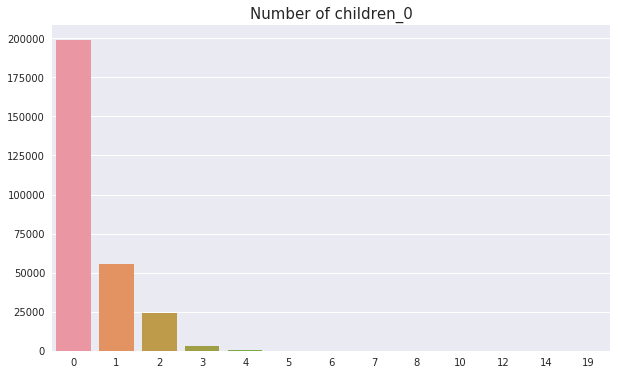

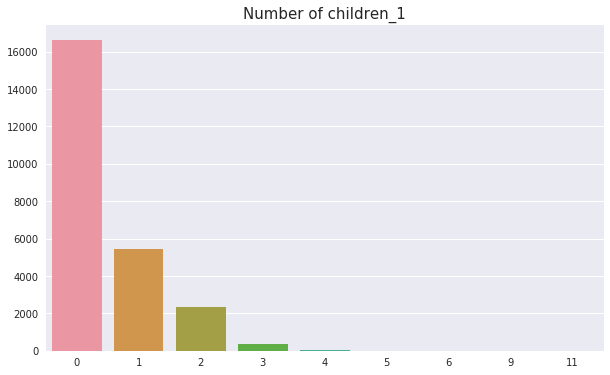

In [55]:

plt.figure(figsize=(10,6))
sizes = np.array(child_cnt_0/child_cnt_0.sum())
label =  np.array(child_cnt_0.index)
sns.barplot(child_cnt_0 .index,child_cnt_0.values)
plt.title("Number of children_0", fontsize=15)

plt.figure(figsize=(10,6))
sizes = np.array(child_cnt_1 /child_cnt_1.sum())
label =  np.array(child_cnt_1.index)
sns.barplot(child_cnt_1 .index,child_cnt_1.values)
plt.title("Number of children_1", fontsize=15)
plt.show()

# 子供が3人以上の割合で差がある
# 子供の数に比例して支出が高くなるので、この比をベースに新しい特徴を作れそう

In [56]:
# var = ['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_BIRTH',
#        'DAYS_CREDIT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
#        'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']

In [57]:
# birth_day_cnt_0 = grouped_1.DAYS_BIRTH.value_counts()
# birth_day_cnt_1 = grouped_1.DAYS_BIRTH.value_counts()
# plt.figure(figsize=(10,6))
# sizes = np.array(child_cnt_0/child_cnt_0.sum())
# label =  np.array(child_cnt_0.index)
# sns.barplot(child_cnt_0 .index,child_cnt_0.values)
# plt.title("Number of children_0", fontsize=15)

# plt.figure(figsize=(10,6))
# sizes = np.array(child_cnt_1 /child_cnt_1.sum())
# label =  np.array(child_cnt_1.index)
# sns.barplot(child_cnt_1 .index,child_cnt_1.values)
# plt.title("Number of children_1", fontsize=15)
# plt.show()

In [58]:
# AMT_CREDIT
# AMT_ANNUITY
# DAYS_EMPLOYED

# 相関係数の算出

In [62]:
df_corr = grouped_0.corr()

In [63]:
corrmat  = application_train.corr()

In [64]:
# corrmat  =train_bureau.corr()

# 相関係数の絶対値が高い上位１０の特徴をプロット

In [65]:
cols = abs(corrmat).nlargest(10, 'TARGET').index

In [66]:
cols 

Index(['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'DAYS_CREDIT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH'],
      dtype='object')

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Text(0.5,1,'Correlation coefficient with objective variable')

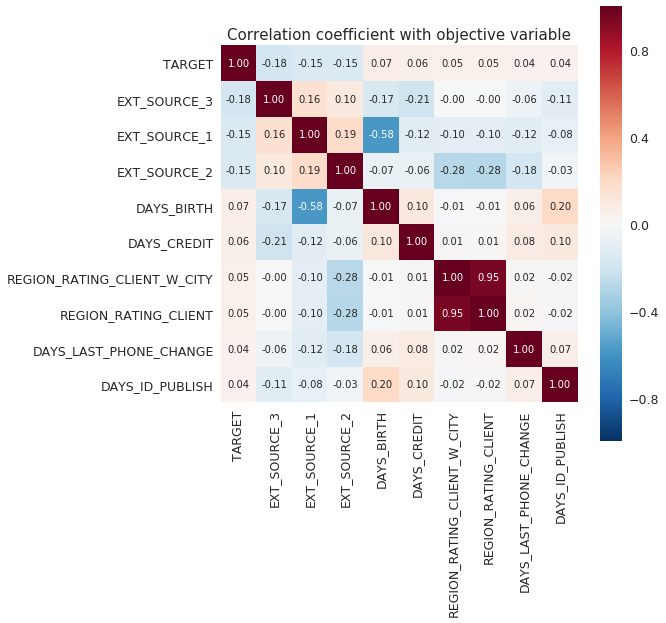

In [67]:
plt.figure(figsize=(8,8))
cm =  train_bureau[cols].corr()
sns.set(font_scale=1.25)
hm= sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation coefficient with objective variable', fontsize=15)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


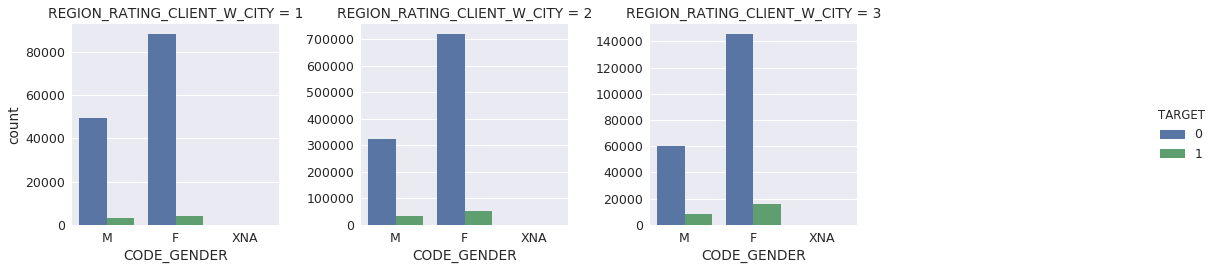

In [69]:
sns.factorplot(x="CODE_GENDER", hue="TARGET", col="REGION_RATING_CLIENT_W_CITY", data=train_bureau , kind="count", col_wrap=4, sharey=False);

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


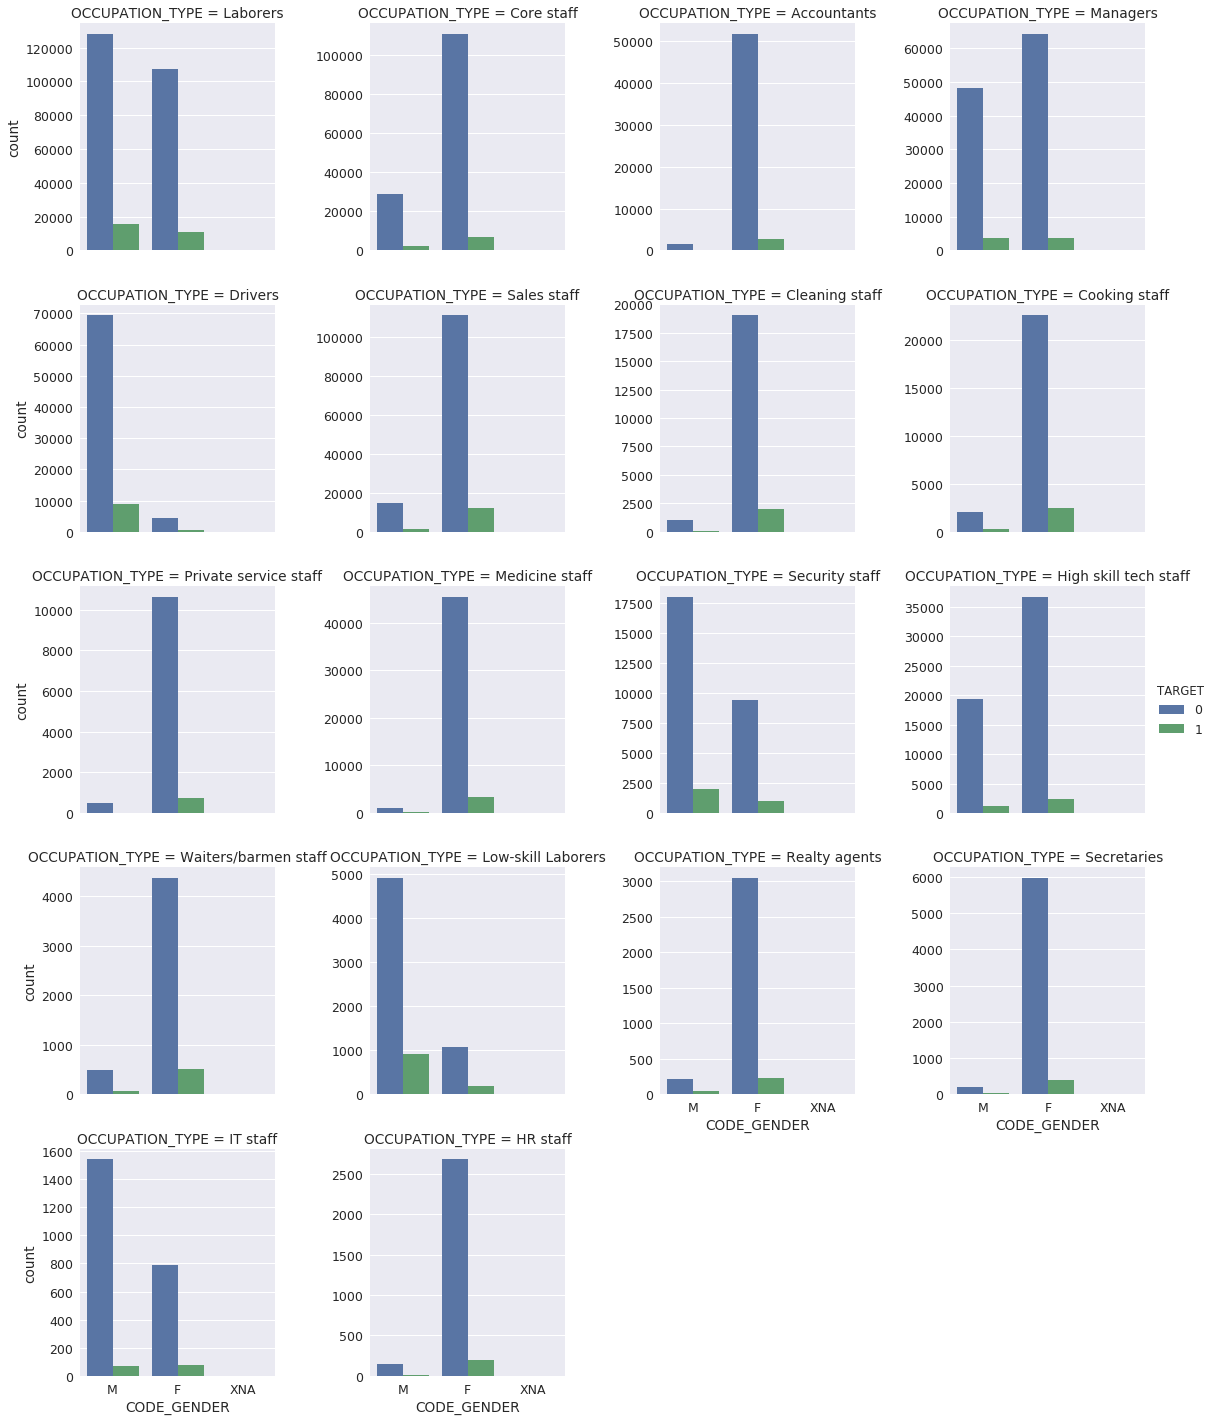

In [70]:
#kind : {point, bar, count, box, violin, strip}、プロットの種類

sns.factorplot(x="CODE_GENDER", hue="TARGET", col="OCCUPATION_TYPE", data=train_bureau , kind="count", col_wrap=4, sharey=False);

## 職業別に乖離が見られる 
## 低所得者ほどデフォルトしてそう


In [ ]:

# sns.factorplot(y="AMT_CREDIT",hue="TARGET", col="OCCUPATION_TYPE", data=train_bureau , kind="count", col_wrap=4, sharey=False);

In [71]:
occ_cre_av = train_bureau.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].mean()

In [72]:
#マルチインデックスとなっていてseabornで描画できないので、reset_index
occ_cre_av = occ_cre_av.reset_index()
occ_cre_av 

,OCCUPATION_TYPE,AMT_CREDIT
0,Accountants,723737.237092
1,Cleaning staff,529214.832076
2,Cooking staff,555268.521925
3,Core staff,646297.997230
4,Drivers,629805.876441
5,HR staff,659707.192270
6,High skill tech staff,654169.957589
7,IT staff,678071.970838
8,Laborers,592725.879959
9,Low-skill Laborers,479077.582852


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


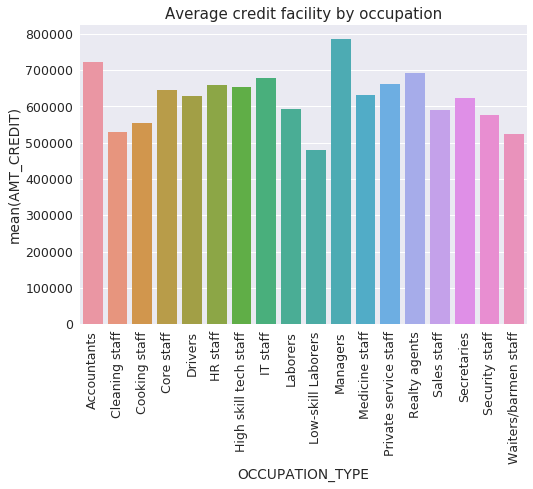

In [73]:
sns.barplot(x='OCCUPATION_TYPE' ,y = 'AMT_CREDIT',data=occ_cre_av)
#グラフのタイトルを設定する
plt.title('Average credit facility by occupation', fontsize=15)
#x軸のメモリの文字を回転して垂直にする
plt.xticks(rotation='vertical')
#表示
plt.show()

# Light GBMで重要度を可視化

Light GBMではデータ型がobjectだとエラーを返してしまう
そのため、LightGBMを使用するための前処理を行う

まずデータ型がobjectの特徴を取得
そして取得した特徴のデータにfactlize(数値化)
以上のような処理で前処理を行う

In [267]:
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

In [268]:
X = application_train.drop('TARGET',axis=1)
y = application_train['TARGET']

In [269]:
# カテゴリ変数を取得
data_cats = _get_categorical_features(X)

In [270]:
# カテゴリ変数をファクトライズ
data = _factorize_categoricals(X, data_cats)

In [271]:
x_train, x_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=18)

In [272]:
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

In [273]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 150 rounds.
[200]	valid_0's auc: 0.7449
[400]	valid_0's auc: 0.752655
[600]	valid_0's auc: 0.756078
[800]	valid_0's auc: 0.757708
[1000]	valid_0's auc: 0.758297
[1200]	valid_0's auc: 0.758617
[1400]	valid_0's auc: 0.758703
Early stopping, best iteration is:
[1340]	valid_0's auc: 0.758769


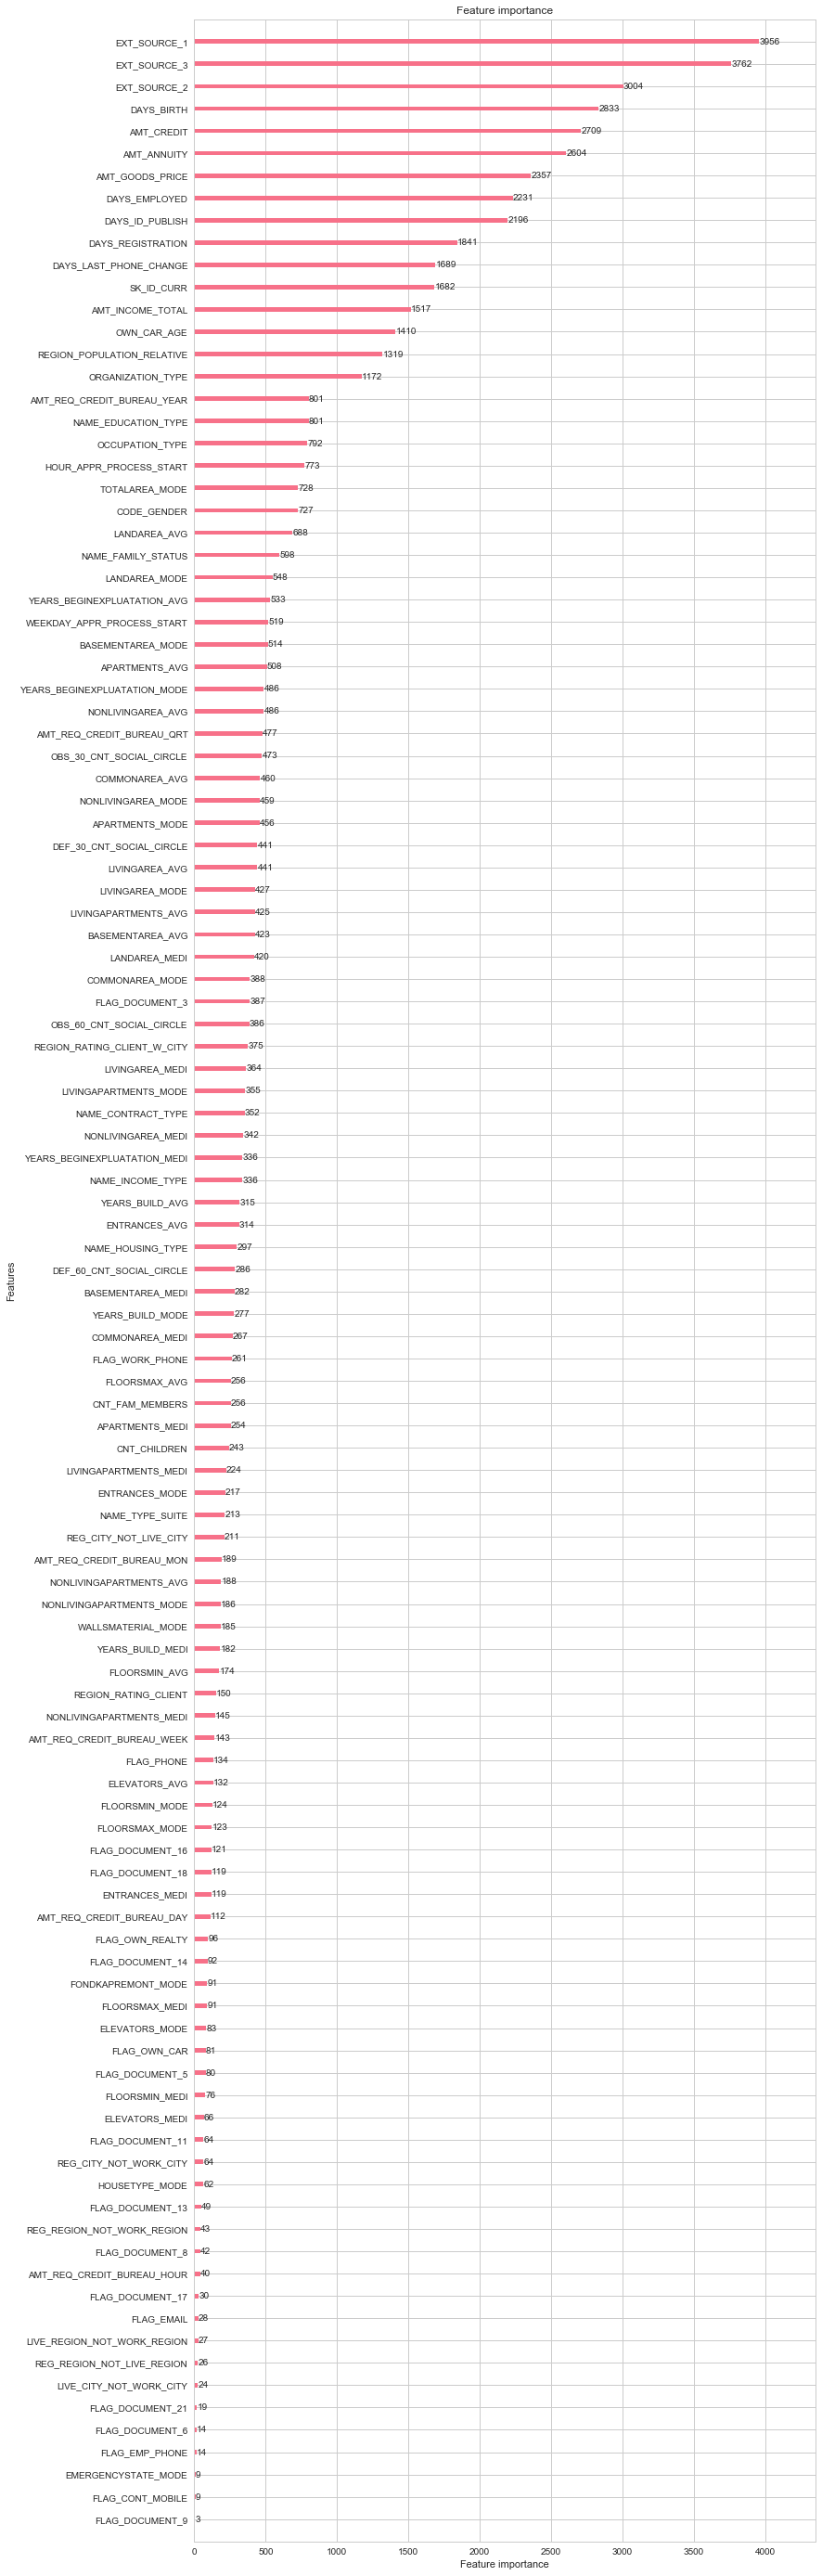

In [312]:
lgb.plot_importance(model, figsize=(12, 50));

In [319]:
# lgb.plot_tree(model,figsize=(12, 50));
# モデルの木構造の視覚化に必要なパッケージ
from sklearn import tree
import pydotplus as pdp

# light gbm の木構造の可視化ファイルの出力

In [335]:
graph = lgb.create_tree_digraph(model,format='png');
graph.render(view=True)

'Digraph.gv.png'

# 可視化

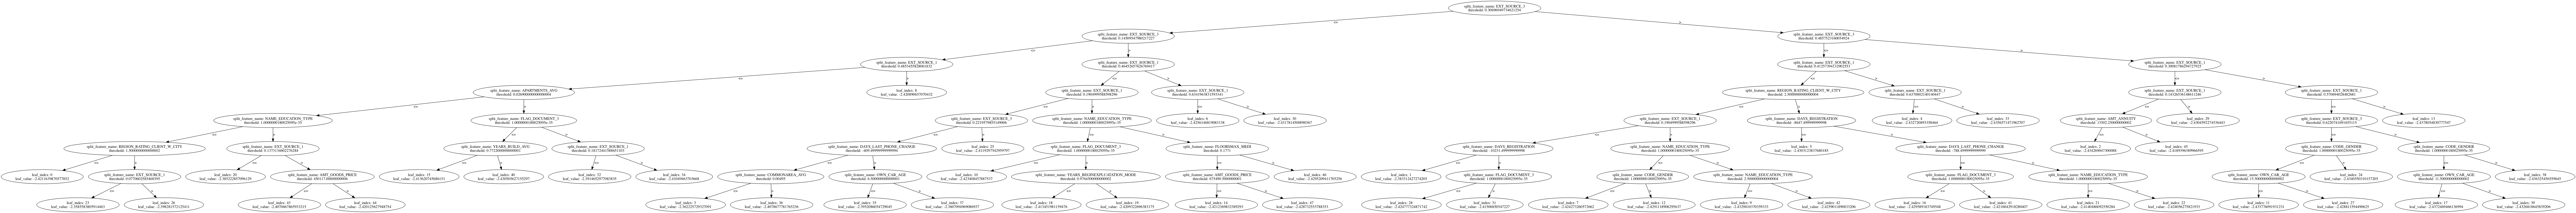

In [338]:
from IPython.display import Image,display_png
display_png(Image('Digraph.gv.png'))


![](Digraph.gv.pdf)

# 最初に相関の出ていた特徴がやはり重要な師匠となっていることがわかる。

# 欠損値の把握
Light GBM　では欠損値をその辺をよしなに処理してくれるので、後回しにしましたが、欠損値の確認を行う。
他のモデルを試す際は、欠損値を適切に処理を行う必要がある。
具体的には、欠損発生の傾向により行う処理が変わってくる。

In [349]:
train_null = X.isnull().sum().sort_values(ascending=False)
train_null[:30]

COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_AVG               208642
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
YEARS_BUILD_MODE            204488
YEARS_BUILD_MEDI            204488
YEARS_BUILD_AVG             204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_AVG                182590
LANDAREA_MODE               182590
BASEMENTAREA_AVG            179943
BASEMENTAREA_MEDI           179943
BASEMENTAREA_MODE           179943
EXT_SOURCE_1                173378
NONLIVINGAREA_MEDI          169682
NONLIVINGAREA_AVG           169682
NONLIVINGAREA_MODE          169682
ELEVATORS_MEDI              163891
ELEVATORS_AVG               163891
ELEVATORS_MODE      